In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import pickle
from sklearn.metrics import accuracy_score
import time

In [5]:
#---------------------------------------------------------------------------------------------------------------------
# ------------------------------------- Millestone2 -----------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------

data=pd.read_csv("OnlineArticlesPopularity_classfication.csv")
data.shape

data.head()

data.drop(['url', 'title' , ' timedelta'], axis=1, inplace=True)


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns



data['channel type'] = data['channel type'].str.strip()
data['channel type'] = data['channel type'].replace('[]', 'data_channel_is_world')
data.isnull().sum()



 n_tokens_content              0
 n_unique_tokens               0
 n_non_stop_words              0
 n_non_stop_unique_tokens      0
 num_hrefs                     0
 num_self_hrefs                0
 num_imgs                      0
 num_videos                    0
 average_token_length          0
 num_keywords                  0
channel type                   0
 kw_min_min                    0
 kw_max_min                    0
 kw_avg_min                    0
 kw_min_max                    0
 kw_max_max                    0
 kw_avg_max                    0
 kw_min_avg                    0
 kw_max_avg                    0
 kw_avg_avg                    0
 self_reference_min_shares     0
 self_reference_max_shares     0
 self_reference_avg_sharess    0
weekday                        0
isWeekEnd                      0
 LDA_00                        0
 LDA_01                        0
 LDA_02                        0
 LDA_03                        0
 LDA_04                        0
 global_su

In [6]:
data.head()

,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,Article Popularity
0,1011,0.469819,1.0,0.671210,20,5,1,0,4.918892,8,...,0.025717,0.666667,0.333333,0.334834,0.033333,1.0,-0.295833,-1.0,-0.050,Above Average
1,161,0.647799,1.0,0.747368,7,5,3,1,4.354037,10,...,0.018634,0.785714,0.214286,0.291667,0.033333,0.5,-0.275000,-0.4,-0.125,Average
2,207,0.626214,1.0,0.807018,5,2,0,0,4.753623,4,...,0.009662,0.777778,0.222222,0.411395,0.214286,0.5,-0.300000,-0.4,-0.200,Average
3,252,0.581301,1.0,0.729730,5,3,1,0,4.861111,9,...,0.000000,1.000000,0.000000,0.313300,0.033333,0.5,0.000000,0.0,0.000,Average
4,463,0.515419,1.0,0.682657,2,2,1,0,4.980562,5,...,0.036717,0.433333,0.566667,0.265297,0.062500,0.5,-0.227941,-0.8,-0.100,Not Popular


In [7]:
data['channel type'].describe()

count                     38643
unique                        6
top       data_channel_is_world
freq                      14156
Name: channel type, dtype: object

In [8]:
category_mapping1 = {
    'data_channel_is_bus': 0,
    'data_channel_is_socmed': 1,
    'data_channel_is_lifestyle': 2,
    'data_channel_is_world': 3,
    'data_channel_is_tech': 4,
    'data_channel_is_entertainment': 5
}

category_mapping2 = {
    'saturday': 0,
    'sunday': 1,
    'monday': 2,
    'tuesday': 3,
    'wednesday': 4,
    'thursday': 5,
    'friday': 6
}
category_mapping3 = {
    'Yes': 0,
    'No': 1,

}



# Map the 'channel type' column to numerical values based on the mapping
data['channel type'] = data['channel type'].replace(category_mapping1)
data['weekday'] = data['weekday'].replace(category_mapping2)
data['isWeekEnd'] = data['isWeekEnd'].replace(category_mapping3)

# Mapping dictionary for encoding
target_mapping = { 'Very Popular': 0,'Above Average': 1, 'Average':2 , 'Not Popular': 3}

# Replace categories with binary values
data['Article Popularity'] = data['Article Popularity'].replace(target_mapping)

C:\Users\hp\AppData\Local\Temp\ipykernel_1988\2624132132.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['channel type'] = data['channel type'].replace(category_mapping1)
C:\Users\hp\AppData\Local\Temp\ipykernel_1988\2624132132.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['weekday'] = data['weekday'].replace(category_mapping2)
C:\Users\hp\AppData\Local\Temp\ipykernel_1988\2624132132.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [9]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
        if data[col].isnull().any():  # Check if column has missing values
            data[col].fillna(data[col].mean(), inplace=True)  # Fill with mean of training data

In [10]:
print(data['Article Popularity'].unique())

[1 2 3 0]


C:\Users\hp\AppData\Local\Temp\ipykernel_1988\1785008695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.drop('Article Popularity').values, y=correlation_with_target.drop('Article Popularity').index, palette='coolwarm')


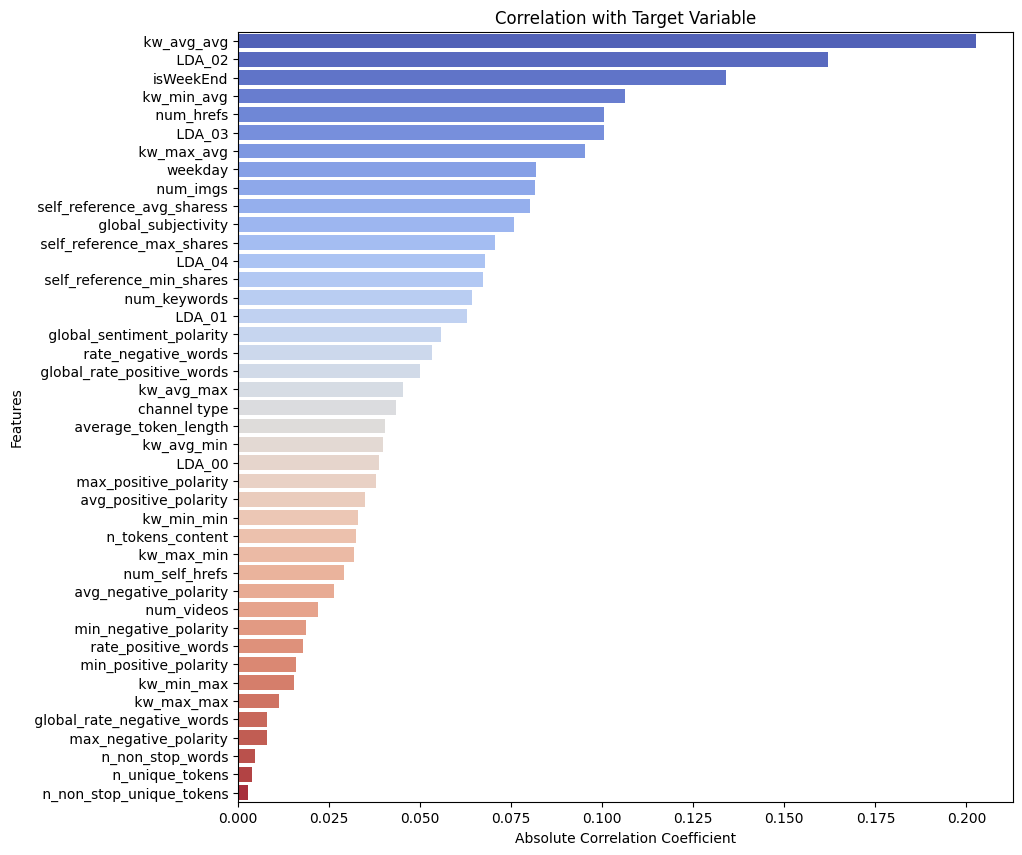

In [11]:
# Calculate Pearson correlation coefficients
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Article Popularity'].abs().sort_values(ascending=False)
# Plot bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x=correlation_with_target.drop('Article Popularity').values, y=correlation_with_target.drop('Article Popularity').index, palette='coolwarm')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation with Target Variable')
plt.show()

In [12]:

X = data.drop(columns=['Article Popularity'])
y = data['Article Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Define the hyperparameters to vary
n_estimators_choices = [50, 100, 150]
max_depth_choices = [None, 10, 20]

for n_estimators in n_estimators_choices:
    for max_depth in max_depth_choices:
        # Define the RandomForestClassifier with fixed hyperparameters
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                       min_samples_split=2, min_samples_leaf=1)

        # Train the model
        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        training_time_RF = time.time() - start_time

        start_time = time.time()
        predictions = model.predict(X_test_scaled)
        testing_time_RF = time.time() - start_time
        accuracy = accuracy_score(y_test, predictions)

        print(f"n_estimators={n_estimators}, max_depth={max_depth}")
        print("Random Forest Accuracy (tuned):", accuracy)
        print("Random Forest Training Time (tuned):", training_time_RF)
        print("Random Forest Testing Time (tuned):", testing_time_RF)
        print("-----------------------------------------------------")


n_estimators=50, max_depth=None
Random Forest Accuracy (tuned): 0.4747056540302756
Random Forest Training Time (tuned): 44.41453242301941
Random Forest Testing Time (tuned): 0.40983057022094727
-----------------------------------------------------
n_estimators=50, max_depth=10
Random Forest Accuracy (tuned): 0.4762582481562945
Random Forest Training Time (tuned): 32.530802965164185
Random Forest Testing Time (tuned): 0.18319296836853027
-----------------------------------------------------
n_estimators=50, max_depth=20
Random Forest Accuracy (tuned): 0.4766463966877992
Random Forest Training Time (tuned): 47.089701890945435
Random Forest Testing Time (tuned): 0.30418920516967773
-----------------------------------------------------
n_estimators=100, max_depth=None
Random Forest Accuracy (tuned): 0.47690516237546904
Random Forest Training Time (tuned): 100.18101787567139
Random Forest Testing Time (tuned): 1.3683886528015137
-----------------------------------------------------
n_estima

In [14]:


gradient_boosting = GradientBoostingClassifier()
start_time = time.time()
gradient_boosting.fit(X_train_scaled, y_train)
training_time_GB = time.time() - start_time
start_time = time.time()
gradient_boosting_predictions = gradient_boosting.predict(X_test_scaled)
testing_time_GB = time.time() - start_time
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
# Print accuracies and times
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)
print("Gradient Boosting Training Time:", training_time_GB)
print("Gradient Boosting Testing Time:", testing_time_GB)

In [ ]:
logistic_regression = LogisticRegression()
start_time = time.time()
logistic_regression.fit(X_train_scaled, y_train)
training_time_LG = time.time() - start_time
start_time = time.time()
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)
testing_time_LG = time.time() - start_time
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Training Time:", training_time_LG)
print("Logistic Regression Testing Time:", testing_time_LG)

Logistic Regression Accuracy: 0.4611204554276103
Logistic Regression Training Time: 2.810988664627075
Logistic Regression Testing Time: 0.004804849624633789


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize classifier with specific C and gamma parameters
svm = SVC(C=1.0, gamma='scale')  # You can adjust C and gamma as per your requirement

# Train the classifier
start_time = time.time()
svm.fit(X_train_scaled, y_train)
training_time_svm = time.time() - start_time

# Evaluate the classifier
start_time = time.time()
svm_predictions = svm.predict(X_test_scaled)
testing_time_svm = time.time() - start_time

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print results
print("SVM Accuracy:", svm_accuracy)
print("SVM Training Time:", training_time_svm)
print("SVM Testing Time:", testing_time_svm)



SVM Accuracy: 0.47160046577823783
SVM Training Time: 157.1120891571045
SVM Testing Time: 24.01154613494873


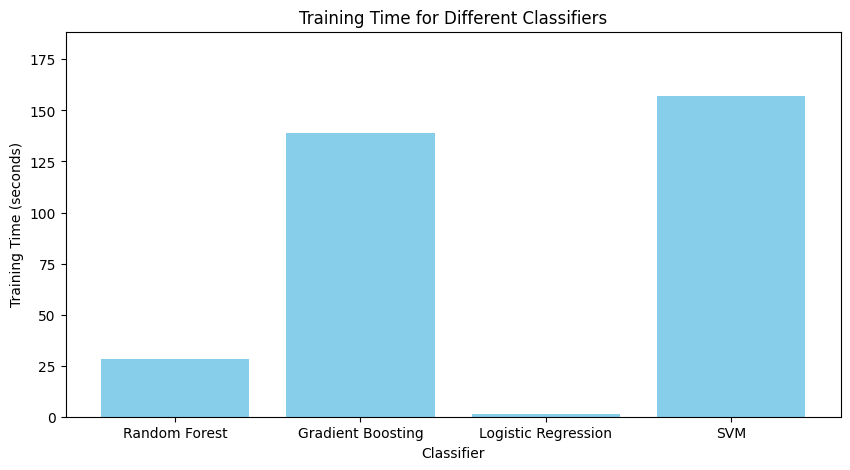

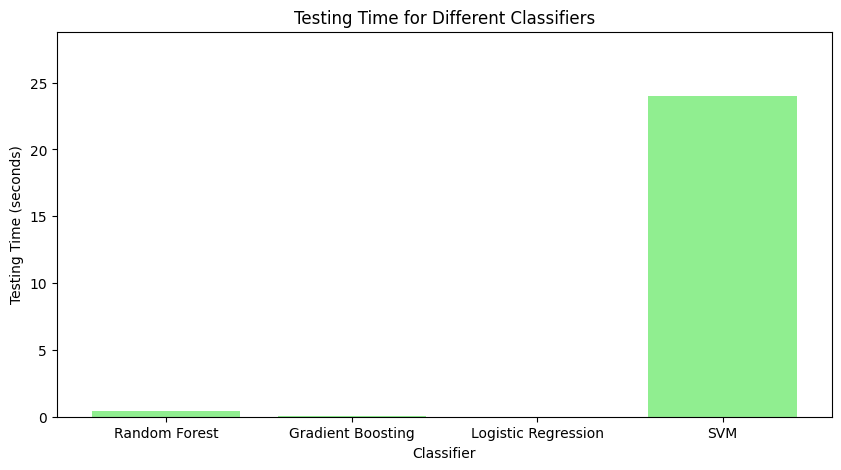

In [ ]:


# Training times
classifiers = ['Random Forest','Gradient Boosting', 'Logistic Regression', 'SVM']
training_times = [training_time_RF,training_time_GB, training_time_LG, training_time_svm]

plt.figure(figsize=(10, 5))
plt.bar(classifiers, training_times, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Different Classifiers')
plt.ylim(0, max(training_times) * 1.2)  # Adjust the multiplier as needed for spacing
plt.show()

# Testing times
testing_times = [testing_time_RF,testing_time_GB, testing_time_LG, testing_time_svm]

plt.figure(figsize=(10, 5))
plt.bar(classifiers, testing_times, color='lightgreen')
plt.xlabel('Classifier')
plt.ylabel('Testing Time (seconds)')
plt.title('Testing Time for Different Classifiers')
plt.ylim(0, max(testing_times) * 1.2)  # Adjust the multiplier as needed for spacing
plt.show()


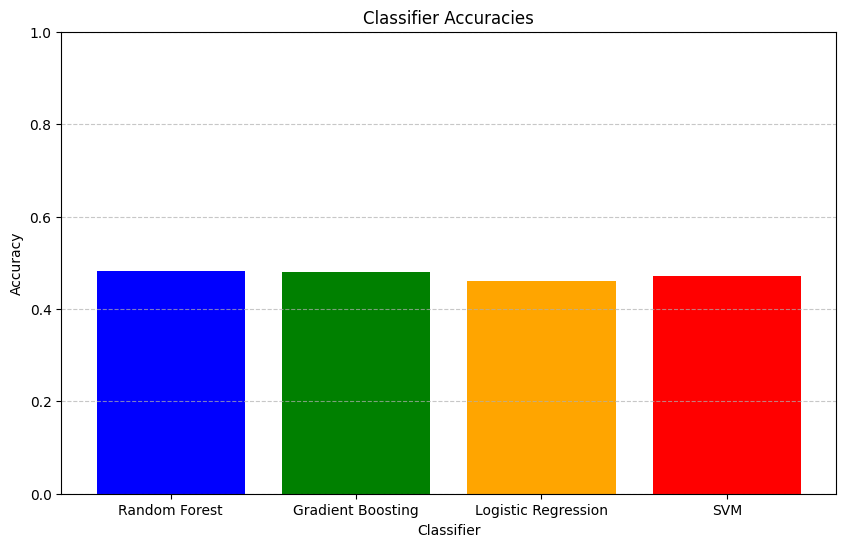

In [ ]:
# Define classifiers and their accuracies
classifiers = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM']
accuracies = [accuracy, gradient_boosting_accuracy, logistic_regression_accuracy, svm_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1,)  # Limit y-axis from 0 to 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Feature selection

In [ ]:
# Set the correlation coefficient threshold
correlation_threshold = 0.05

# Drop columns with correlation coefficient below the threshold
low_correlation_columns = correlation_with_target[correlation_with_target < correlation_threshold].index
data.drop(low_correlation_columns, axis=1, inplace=True)

# Print the columns that were dropped
print("Dropped columns:", low_correlation_columns)

Dropped columns: Index([' global_rate_positive_words', ' kw_avg_max', 'channel type',
       ' average_token_length', ' kw_avg_min', ' LDA_00',
       ' max_positive_polarity', ' avg_positive_polarity', ' kw_min_min',
       ' n_tokens_content', ' kw_max_min', ' num_self_hrefs',
       ' avg_negative_polarity', ' num_videos', ' min_negative_polarity',
       ' rate_positive_words', ' min_positive_polarity', ' kw_min_max',
       ' kw_max_max', ' global_rate_negative_words', ' max_negative_polarity',
       ' n_non_stop_words', ' n_unique_tokens', ' n_non_stop_unique_tokens'],
      dtype='object')


In [ ]:
X = data.drop('Article Popularity', axis=1)
y = data['Article Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy after Feature selection:", accuracy)

KeyboardInterrupt: 

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2

# Select top k features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize classifiers (assuming they are already imported)
gradient_boosting_selected = GradientBoostingClassifier()
logistic_regression_selected = LogisticRegression()
svm_selected = SVC()

# Train each classifier on selected features
gradient_boosting_selected.fit(X_train_selected, y_train)
logistic_regression_selected.fit(X_train_selected, y_train)
svm_selected.fit(X_train_selected, y_train)

# Evaluate each classifier on selected features
gradient_boosting_accuracy_selected = gradient_boosting_selected.score(X_test_selected, y_test)
logistic_regression_accuracy_selected = logistic_regression_selected.score(X_test_selected, y_test)
svm_accuracy_selected = svm_selected.score(X_test_selected, y_test)

# Print accuracies for selected features
print("Gradient Boosting Accuracy (selected features):", gradient_boosting_accuracy_selected)
print("Logistic Regression Accuracy (selected features):", logistic_regression_accuracy_selected)
print("SVM Accuracy (selected features):", svm_accuracy_selected)


KeyboardInterrupt: 

In [ ]:
import pickle
# Save trained models using pickle
with open('Classfication_script.pkl', 'wb') as file:

    pickle.dump(logistic_regression, file)
    pickle.dump(X_scaler, file)
    pickle.dump(category_mapping1, file)
    pickle.dump(category_mapping2, file)
    pickle.dump(category_mapping3, file)
    pickle.dump(target_mapping, file)

In [ ]:
# Load saved models using pickle
with open('Classfication_script.pkl', 'rb') as file:

    loaded_logistic_regression_model = pickle.load(file)
    X_scaler = pickle.load(file)
    category_mapping1 = pickle.load(file)
    category_mapping2 = pickle.load(file)
    category_mapping3 = pickle.load(file)
    target_mapping = pickle.load(file)


In [ ]:
# Load the unseen test data
test_data = pd.read_csv("OnlineArticlesPopularity_classification_test.csv")

test_data.drop(['url', 'title' , ' timedelta'], axis=1, inplace=True)
# Define the list of categorical columns
categorical_columns = ['channel type', 'weekday', 'isWeekEnd']

# Define mode value for each categorical column
mode_values = {}
for col in categorical_columns:
    mode_values[col] = test_data[col].mode()[0]

# Handle missing categorical values
for col in categorical_columns:
    test_data[col] = test_data[col].fillna(mode_values[col])

# Iterate over each column in the test data
for col in test_data.columns:
    # Check if the column has missing values
    if test_data[col].isnull().any():
        # Fill missing values with the mode of the corresponding column from the training data
        mode_value = data[col].mode()[0]  # Calculate mode value from training data
        test_data[col].fillna(mode_value, inplace=True)



In [ ]:
# Handle unseen categories in the new test data
test_data['channel type'] = test_data['channel type'].str.strip().apply(lambda x: category_mapping1.get(x, category_mapping1[test_data['channel type'].str.strip().mode()[0]]))
test_data['weekday'] = test_data['weekday'].str.strip().apply(lambda x: category_mapping2.get(x, category_mapping2[test_data['weekday'].str.strip().mode()[0]]))
test_data['isWeekEnd'] = test_data['isWeekEnd'].str.strip().apply(lambda x: category_mapping3.get(x, category_mapping3[test_data['isWeekEnd'].str.strip().mode()[0]]))

In [ ]:
test_data['Article Popularity'] = test_data['Article Popularity'].replace(target_mapping)

C:\Users\hp\AppData\Local\Temp\ipykernel_20468\1123803788.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Article Popularity'] = test_data['Article Popularity'].replace(target_mapping)


In [ ]:

# Extract features and target variable
test_X = test_data.drop(columns=['Article Popularity'])
test_y = test_data['Article Popularity']

# Scale the test data using the previously fitted StandardScaler
test_X_scaled = X_scaler.transform(test_X)


In [ ]:
# Make predictions using the loaded models

lr_predictions = loaded_logistic_regression_model.predict(test_X_scaled)


lr_accuracy = accuracy_score(test_y, lr_predictions)


print("Logistic Regression - Accuracy:", lr_accuracy)


Logistic Regression - Accuracy: 0.47152847152847155
